In [1]:
# importing libraries and changing their name

import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib

plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
df = pd.read_csv('finished_dataset.csv',parse_dates={'Date': ['Year', 'Month','Day'] })

df.rename(columns = {'Wind Speed' : 'Wind_Speed', 'Wind Direction' : 'Wind_Direction'}, inplace = True)

In [3]:
# Select the subset data from 2016 to 2019
mask = (df['Date'] >= '2014-09-13') & (df['Date'] <= '2019-09-13')
df =df.loc[mask]

In [4]:
# Select the datetime and the wind speedcolumns
ws_df= df[["Date","Wind_Speed"]]
ws_df.head(10)

,Date,Wind_Speed
41160,2014-09-13,1.2
41161,2014-09-13,1.0
41162,2014-09-13,0.6
41163,2014-09-13,0.3
41164,2014-09-13,0.1
41165,2014-09-13,0.1
41166,2014-09-13,0.1
41167,2014-09-13,0.3
41168,2014-09-13,0.8
41169,2014-09-13,1.4


In [5]:
ws_df.set_index("Date",inplace=True)
ws_df.head()

,Wind_Speed
Date,
2014-09-13,1.2
2014-09-13,1.0
2014-09-13,0.6
2014-09-13,0.3
2014-09-13,0.1


In [6]:
# average the monthly wind speed value for each month
# use start of each month as the timestamp
y = ws_df['Wind_Speed'].resample('MS').mean()
y['2016':]

Date
2016-01-01    2.325787
2016-02-01    2.138434
2016-03-01    2.461341
2016-04-01    2.340143
2016-05-01    2.458117
2016-06-01    2.124330
2016-07-01    2.095761
2016-08-01    2.073979
2016-09-01    1.997484
2016-10-01    1.861805
2016-11-01    2.167868
2016-12-01    2.436649
2017-01-01    2.555135
2017-02-01    2.196903
2017-03-01    2.113458
2017-04-01    2.374855
2017-05-01    2.323699
2017-06-01    2.112456
2017-07-01    1.988234
2017-08-01    1.962290
2017-09-01    2.205640
2017-10-01    1.947045
2017-11-01    1.763702
2017-12-01    2.057566
2018-01-01    1.961121
2018-02-01    2.227808
2018-03-01    2.203243
2018-04-01    2.409662
2018-05-01    2.526379
2018-06-01    2.190920
2018-07-01    2.093063
2018-08-01    2.005976
2018-09-01    1.936459
2018-10-01    1.926079
2018-11-01    2.106308
2018-12-01    2.151404
2019-01-01    2.350049
2019-02-01    3.044274
2019-03-01    2.337802
2019-04-01    2.287303
2019-05-01    2.566445
2019-06-01    1.988221
2019-07-01    1.891819
2019-0

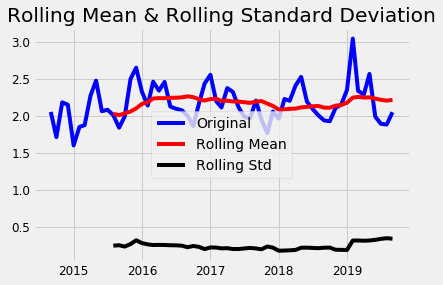

In [8]:
rolling_mean = y.rolling(window = 12).mean()
rolling_std = y.rolling(window = 12).std()
plt.plot(y, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

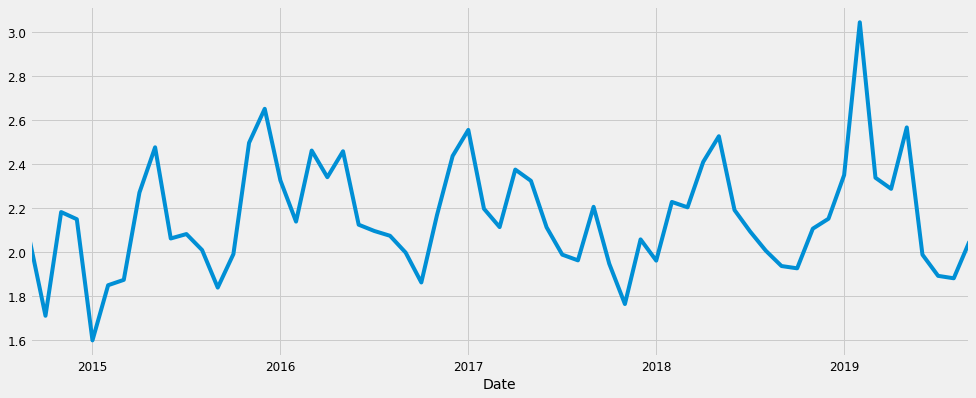

In [7]:
y.plot(figsize = (15, 6))
plt.show()

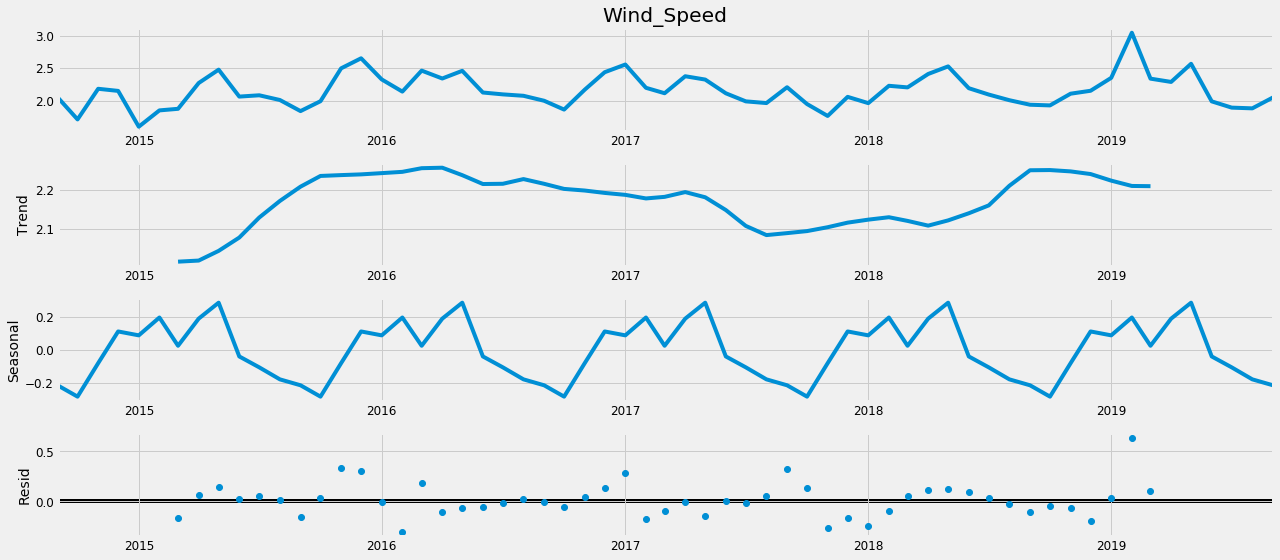

In [9]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model = 'additive')
fig = decomposition.plot()
plt.show()

In [10]:
# set the typical ranges for p, d, q
p = d = q = range(0, 2)

#take all possible combination for p, d and q
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [11]:
# Using Grid Search find the optimal set of parameters that yields the best performance
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order = param, seasonal_order = param_seasonal, 
                                            enforce_stationary = False,enforce_invertibility=False) 
            result = mod.fit()   
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, result.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:269.66436708878314


C:\Users\Swati\Downloads\Anaconda3.7.6\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:272.2003398447433
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:15.833061159266261
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:11.657433308220186
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:69.95819459565516


C:\Users\Swati\Downloads\Anaconda3.7.6\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:66.14672354833364
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:14.163417864405778
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:13.657422053486005
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:196.4980248862724


C:\Users\Swati\Downloads\Anaconda3.7.6\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:199.18367796840334
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:4.527127739067366
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1.2875124604803787
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:47.60672329717168


C:\Users\Swati\Downloads\Anaconda3.7.6\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:50.36384885792447
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:3.6238309882229194
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2.887737908622773
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:14.10549185943241
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:9.477106805987194
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:16.28175771002028


C:\Users\Swati\Downloads\Anaconda3.7.6\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1607.9700177861992
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:9.00915472040226
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:10.949938486809486
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:16.90520186797287


C:\Users\Swati\Downloads\Anaconda3.7.6\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1828.302353187933
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:11.729158370137961
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:5.690023512622745
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:13.87932947261655


C:\Users\Swati\Downloads\Anaconda3.7.6\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:2215.1861996427383
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:5.117453215801157
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:7.09860197132496
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:13.862559445710414


C:\Users\Swati\Downloads\Anaconda3.7.6\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:2219.207579899943
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:20.156857686489353


C:\Users\Swati\Downloads\Anaconda3.7.6\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:22.696972314763904
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:4.093218559440395
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:2.548495403412605
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:14.664094654196452
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:16.663595674102808
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:3.9406452430044996
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:4.157144428834348
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:17.873340872703043


C:\Users\Swati\Downloads\Anaconda3.7.6\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:20.49313520685167
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:6.019672790653928
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:3.2670451520406685
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:11.110767616652977
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:13.05048443097092
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:5.608851537794938
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:4.887604049407713
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:14.27748520010058
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:8.817855896152484
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:15.936415152983145


C:\Users\Swati\Downloads\Anaconda3.7.6\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:2204.592862319417
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:8.230068606830095
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:10.196681997476196
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:16.486269714453407


C:\Users\Swati\Downloads\Anaconda3.7.6\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:2208.614243696471
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:2.075983933987156
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:-2.915641840876008
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:9.244029439686038


C:\Users\Swati\Downloads\Anaconda3.7.6\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:2159.144712406739
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:-3.4118959125261767
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:-1.5032268747602284
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:9.627444821249092
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:2163.166058153215


C:\Users\Swati\Downloads\Anaconda3.7.6\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [12]:
#Fitting the ARIMA model using above optimal combination of p, d, q (optimal means combination at which we got lowest AIC score)

model = sm.tsa.statespace.SARIMAX(y, order = (1, 1, 1),
                                  seasonal_order = (1, 0, 0, 12)
                                 )
result = model.fit()
print(result.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4816      0.150      3.204      0.001       0.187       0.776
ma.L1         -0.9999     17.382     -0.058      0.954     -35.068      33.068
ar.S.L12       0.4305      0.176      2.444      0.015       0.085       0.776
sigma2         0.0448      0.774      0.058      0.954      -1.472       1.562


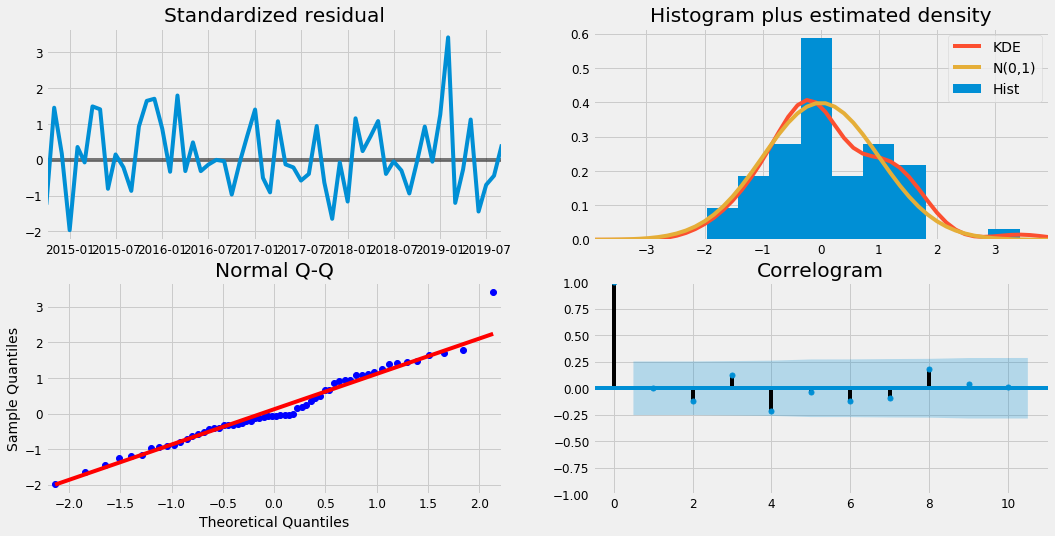

In [13]:
#run model diagnostic to investigate any unusual behavior
result.plot_diagnostics(figsize = (16, 8))
plt.show()

In [14]:
prediction = result.get_prediction(start = pd.to_datetime('2016-09-01'), dynamic = False)
prediction_ci = prediction.conf_int()
prediction_ci

,lower Wind_Speed,upper Wind_Speed
Date,,
2016-09-01,1.585879,2.424722
2016-10-01,1.649852,2.488488
2016-11-01,1.766282,2.604720
2016-12-01,1.875059,2.713307
2017-01-01,1.835508,2.673574
2017-02-01,1.885579,2.723470
2017-03-01,1.888823,2.726547
2017-04-01,1.725797,2.563360
2017-05-01,1.932099,2.769507


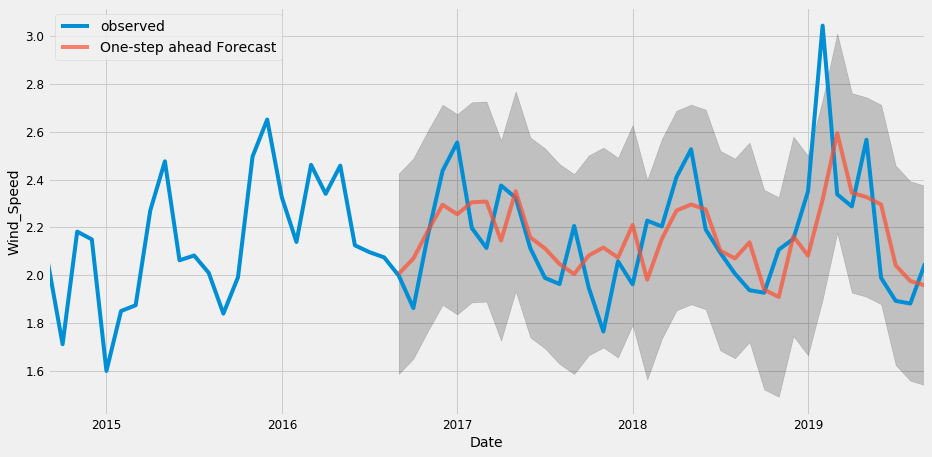

In [15]:
#Visualize the forecasting
ax = y['2014':].plot(label = 'observed')
prediction.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = 0.7, figsize = (14, 7))
ax.fill_between(prediction_ci.index, prediction_ci.iloc[:, 0], prediction_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax.set_xlabel("Date")
ax.set_ylabel('Wind_Speed')
plt.legend()
plt.show()

In [16]:
# Evaluation metrics are Squared Mean Error(SME) and Root Mean Squared Error(RMSE)
y_hat = prediction.predicted_mean
y_truth = y['2017-01-01':]

mse = ((y_hat - y_truth) ** 2).mean()
rmse = np.sqrt(mse)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Mean Squared Error of our forecasts is 0.05
The Root Mean Squared Error of our forecasts is 0.22


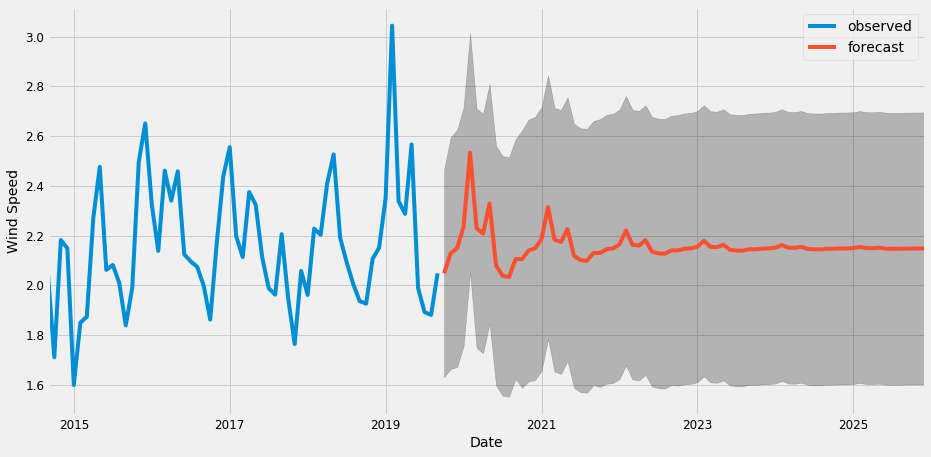

In [18]:
# forcasting for out of sample data
pred_uc = result.get_forecast(steps = 75)
pred_ci = pred_uc.conf_int()

ax = y.plot(label = 'observed', figsize = (14, 7))
pred_uc.predicted_mean.plot(ax = ax, label = 'forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Wind Speed')

plt.legend()
plt.show()

In [19]:
pred_ci

,lower Wind_Speed,upper Wind_Speed
2019-10-01,1.631032,2.465607
2019-11-01,1.662786,2.593508
2019-12-01,1.671789,2.625492
2020-01-01,1.754697,2.714641
2020-02-01,2.052823,3.014684
...,...,...
2025-08-01,1.599844,2.693385
2025-09-01,1.600908,2.694450
2025-10-01,1.600820,2.694540
2025-11-01,1.601286,2.695090


In [20]:
pred_ci['Predicted Wind Speed'] = (pred_ci['lower Wind_Speed'] + pred_ci['upper Wind_Speed'])/2
print(pred_ci)

            lower Wind_Speed  upper Wind_Speed  Predicted Wind Speed
2019-10-01          1.631032          2.465607              2.048320
2019-11-01          1.662786          2.593508              2.128147
2019-12-01          1.671789          2.625492              2.148641
2020-01-01          1.754697          2.714641              2.234669
2020-02-01          2.052823          3.014684              2.533753
...                      ...               ...                   ...
2025-08-01          1.599844          2.693385              2.146614
2025-09-01          1.600908          2.694450              2.147679
2025-10-01          1.600820          2.694540              2.147680
2025-11-01          1.601286          2.695090              2.148188
2025-12-01          1.601397          2.695240              2.148318

[75 rows x 3 columns]


In [21]:
pred_ci.to_csv("Wind Speed Prediction values")